<a href="https://colab.research.google.com/github/alinayawar/deep/blob/main/tflite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import load_model
import tensorflow as tf

model = load_model("/content/cats_and_dogs_small_1 (1).h5")


converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

print("model converted")

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)
  

INFO:tensorflow:Assets written to: /tmp/tmpgdu1e2oe/assets


model converted


In [29]:
import numpy as np
import tensorflow as tf
import cv2

img = cv2.imread("/content/r_kolala.jpeg")
img = cv2.resize(img, (150,150))
img = np.array(img, dtype="float32")
img = np.reshape(img,(1,150,150,3))


# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']

print("*"*50, input_details)
interpreter.set_tensor(input_details[0]['index'], img)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

************************************************** [{'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([  1, 150, 150,   3], dtype=int32), 'shape_signature': array([ -1, 150, 150,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[[2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39
  2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39
  2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39
  2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39
  2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39
  2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39
  2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39
  2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39 2.938265e-39
  5.070150e-24 2.938265e-39

In [9]:
pip install Pillow

In [12]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.1.2


In [21]:
# load and show an image with Pillow
from PIL import Image
# Open the image form working directory
image = Image.open('/content/download.jpg')
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)
print(image)

JPEG
(183, 275)
RGB
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=183x275 at 0x7FD1A7A9D2D0>


uint8
(275, 183, 3)


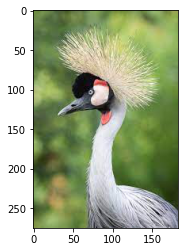

In [22]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread('/content/download.jpg')
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

In [24]:
load_img_rz = np.array(Image.open('/content/download.jpg').resize((200,200)))
Image.fromarray(load_img_rz).save('r_kolala.jpeg')
print("After resizing:",load_img_rz.shape)

After resizing: (200, 200, 3)
